In [71]:
# drive mount

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def train_linear_regression(df, x_cols, y_col):
    # Features (X)
    X = df[x_cols]

    # Target (y)
    y = df[y_col]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a linear regression model
    model = LinearRegression()

    # Train the model using the training sets
    model.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

    return model, mse, r2


In [73]:
from sklearn.linear_model import TweedieRegressor
from sklearn.preprocessing import MinMaxScaler

def train_tweedie_regression(df, x_cols, y_col):
    # Features (X)
    X = df[x_cols]

    # Target (y)
    y = df[y_col]

    # Scale the target variable to be between 0 and 1
    scaler = MinMaxScaler()
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).ravel()

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

    # Create a Tweedie regression model with a log link function
    model = TweedieRegressor(link='log')

    # Train the model using the training sets
    model.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = model.predict(X_test)

    # Transform predictions back to original scale
    y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred_original_scale)
    r2 = r2_score(y_test, y_pred_original_scale)

    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

    return model, mse, r2

In [74]:
import xgboost as xgb

def train_xgboost_regression(df, x_cols, y_col):
    # Features (X)
    X = df[x_cols]

    # Target (y)
    y = df[y_col]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create an XGBoost regression model
    model = xgb.XGBRegressor(objective='reg:squarederror')

    # Train the model using the training sets
    model.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

    return model, mse, r2


In [75]:
!pip install catboost

In [76]:
from catboost import CatBoostRegressor

def train_catboost_regression(df, x_cols, y_col):
    # Features (X)
    X = df[x_cols]

    # Target (y)
    y = df[y_col]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a CatBoost regression model
    model = CatBoostRegressor()

    # Train the model using the training sets
    model.fit(X_train, y_train, verbose=False)

    # Make predictions using the testing set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

    return model, mse, r2


In [77]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

def train_neural_network(df, x_cols, y_col):
    # Features (X)
    X = df[x_cols]

    # Target (y)
    y = df[y_col]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build the neural network model
    model = Sequential()
    model.add(Dense(64, input_dim=len(x_cols), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Define early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model with early stopping
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=128, verbose=True, callbacks=[early_stopping])

    # Evaluate the model
    y_pred = model.predict(X_test).flatten()  # Flatten to 1D array

    # Ensure predictions are within [0, 1] range
    y_pred = tf.clip_by_value(y_pred, 0, 1)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

    return model, mse, r2, history

# Example usage:
# Assuming df is your DataFrame, x_cols is a list of feature columns, and y_col is the target column
# model, mse, r2, history = train_neural_network(df, x_cols, y_col)


In [78]:
import numpy as np
import pandas as pd

car_df=pd.read_csv('/content/drive/MyDrive/Car Parking Prediction/Copy of CarparkInfo(1).csv')
avail_df=pd.read_csv('/content/drive/MyDrive/Car Parking Prediction/Copy of my_data_v3.csv')

In [79]:
car_df.head()

,car_park_no,address,x_coord,y_coord,car_park_type,type_of_parking_system,short_term_parking,free_parking,night_parking,car_park_decks,gantry_height,car_park_basement
0,ACB,BLK 270/271 ALBERT CENTRE BASEMENT CAR PARK,30314.7936,31490.4942,BASEMENT CAR PARK,ELECTRONIC PARKING,WHOLE DAY,NO,YES,1,1.8,Y
1,ACM,BLK 98A ALJUNIED CRESCENT,33758.4143,33695.5198,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,5,2.1,N
2,AH1,BLK 101 JALAN DUSUN,29257.7203,34500.3599,SURFACE CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,0,0.0,N
3,AK19,BLOCK 253 ANG MO KIO STREET 21,28185.4359,39012.6664,SURFACE CAR PARK,COUPON PARKING,7AM-7PM,NO,NO,0,0.0,N
4,AK31,BLK 302/348 ANG MO KIO STREET 31,29482.0290,38684.1754,SURFACE CAR PARK,COUPON PARKING,NO,NO,NO,0,0.0,N


In [80]:
avail_df.head()

,car_park_no,update_datetime,total_lots,lot_type,lots_available,ratio
0,HE12,2023-09-12T08:28:54,105,C,70,0.666667
1,HLM,2023-09-12T08:29:17,583,C,292,0.500858
2,RHM,2023-09-12T08:28:56,329,C,169,0.513678
3,BM29,2023-09-12T07:31:25,97,C,51,0.525773
4,Q81,2023-09-12T08:29:19,96,C,19,0.197917


In [81]:
print(car_df.shape)
print(avail_df.shape)

(2201, 12)
(882800, 6)


In [82]:
merged_df = pd.merge(avail_df, car_df, on='car_park_no', how='inner')
merged_df.head()

,car_park_no,update_datetime,total_lots,lot_type,lots_available,ratio,address,x_coord,y_coord,car_park_type,type_of_parking_system,short_term_parking,free_parking,night_parking,car_park_decks,gantry_height,car_park_basement
0,HE12,2023-09-12T08:28:54,105,C,70,0.666667,BLK 78/81 REDHILL LANE,26367.5806,30069.2434,SURFACE CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,0,4.5,N
1,HE12,2023-09-11T08:28:40,105,C,38,0.361905,BLK 78/81 REDHILL LANE,26367.5806,30069.2434,SURFACE CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,0,4.5,N
2,HE12,2023-09-10T08:29:05,105,C,0,0.000000,BLK 78/81 REDHILL LANE,26367.5806,30069.2434,SURFACE CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,0,4.5,N
3,HE12,2023-09-09T08:28:30,105,C,0,0.000000,BLK 78/81 REDHILL LANE,26367.5806,30069.2434,SURFACE CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,0,4.5,N
4,HE12,2023-09-08T08:28:29,105,C,5,0.047619,BLK 78/81 REDHILL LANE,26367.5806,30069.2434,SURFACE CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,0,4.5,N


In [83]:
merged_df.shape

(871723, 17)

In [84]:
print("no of duplicate records ", merged_df.duplicated().sum())
merged_df.drop_duplicates(inplace=True)
print("shape after remove duplicates ", merged_df.shape)

no of duplicate records  36315
shape after remove duplicates  (835408, 17)


In [85]:
#drop na
merged_df.dropna(inplace=True, axis=0)

In [86]:
#drop unecessary column
merged_df.drop(columns=["total_lots", "lots_available", "address"], inplace=True)

In [87]:
merged_df.head()

,car_park_no,update_datetime,lot_type,ratio,x_coord,y_coord,car_park_type,type_of_parking_system,short_term_parking,free_parking,night_parking,car_park_decks,gantry_height,car_park_basement
0,HE12,2023-09-12T08:28:54,C,0.666667,26367.5806,30069.2434,SURFACE CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,0,4.5,N
1,HE12,2023-09-11T08:28:40,C,0.361905,26367.5806,30069.2434,SURFACE CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,0,4.5,N
2,HE12,2023-09-10T08:29:05,C,0.000000,26367.5806,30069.2434,SURFACE CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,0,4.5,N
3,HE12,2023-09-09T08:28:30,C,0.000000,26367.5806,30069.2434,SURFACE CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,0,4.5,N
4,HE12,2023-09-08T08:28:29,C,0.047619,26367.5806,30069.2434,SURFACE CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,0,4.5,N


In [88]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

def applyEncodingAndStandrization(df):
    # Standardization for numeric columns
    numeric_columns = ['ratio', 'x_coord', 'y_coord', 'car_park_decks', 'gantry_height']
    scaler = StandardScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

    # Normalization for updated_datetime column
    df['update_datetime'] = pd.to_datetime(df['update_datetime'])
    df['update_datetime'] = (df['update_datetime'] - df['update_datetime'].min()) / (df['update_datetime'].max() - df['update_datetime'].min())

    # Label Encoding
    label_encoder = LabelEncoder()
    categorical_columns = ['lot_type', 'car_park_type', 'type_of_parking_system', 'short_term_parking', 'free_parking', 'night_parking', 'car_park_basement']
    for col in categorical_columns:
        df[col] = label_encoder.fit_transform(df[col])

    return df


In [89]:
applyEncodingAndStandrization(merged_df)

,car_park_no,update_datetime,lot_type,ratio,x_coord,y_coord,car_park_type,type_of_parking_system,short_term_parking,free_parking,night_parking,car_park_decks,gantry_height,car_park_basement
0,HE12,1.000000,0,0.668813,-0.284286,-1.642199,5,1,3,2,1,-0.921341,0.929940,0
1,HE12,0.999679,0,-0.658014,-0.284286,-1.642199,5,1,3,2,1,-0.921341,0.929940,0
2,HE12,0.999358,0,-2.233622,-0.284286,-1.642199,5,1,3,2,1,-0.921341,0.929940,0
3,HE12,0.999036,0,-2.233622,-0.284286,-1.642199,5,1,3,2,1,-0.921341,0.929940,0
4,HE12,0.998715,0,-2.026305,-0.284286,-1.642199,5,1,3,2,1,-0.921341,0.929940,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871718,H3BL,0.988763,0,2.098262,0.615767,0.565439,5,1,2,0,0,-0.921341,-1.294352,0
871719,H3BL,0.988442,0,2.109146,0.615767,0.565439,5,1,2,0,0,-0.921341,-1.294352,0
871720,H3BL,0.988121,0,2.109146,0.615767,0.565439,5,1,2,0,0,-0.921341,-1.294352,0
871721,H3BL,0.987800,0,2.087378,0.615767,0.565439,5,1,2,0,0,-0.921341,-1.294352,0


In [90]:
#check data strength
train_linear_regression(merged_df, x_cols=["update_datetime", "lot_type", "x_coord","y_coord", "car_park_type", "type_of_parking_system","short_term_parking", "free_parking", "night_parking", "car_park_decks", "gantry_height", "car_park_basement"], y_col='ratio')

Mean Squared Error: 0.7447584595657523
R-squared: 0.2619071446879834


(LinearRegression(), 0.7447584595657523, 0.2619071446879834)

In [91]:
train_tweedie_regression(merged_df, x_cols=["update_datetime", "lot_type", "x_coord","y_coord", "car_park_type", "type_of_parking_system","short_term_parking", "free_parking", "night_parking", "car_park_decks", "gantry_height", "car_park_basement"], y_col='ratio')

Mean Squared Error: 0.012233089642492428
R-squared: -4.744855512423516


(TweedieRegressor(link='log'), 0.012233089642492428, -4.744855512423516)

In [92]:
train_xgboost_regression(merged_df, x_cols=["update_datetime", "lot_type", "x_coord","y_coord", "car_park_type", "type_of_parking_system","short_term_parking", "free_parking", "night_parking", "car_park_decks", "gantry_height", "car_park_basement"], y_col='ratio')

Mean Squared Error: 0.2876737258333197
R-squared: 0.7149009602088109


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...),
 0.2876737258333197,
 0.7149009602088109)

In [93]:
train_catboost_regression(merged_df, x_cols=["update_datetime", "lot_type", "x_coord","y_coord", "car_park_type", "type_of_parking_system","short_term_parking", "free_parking", "night_parking", "car_park_decks", "gantry_height", "car_park_basement"], y_col='ratio')

Mean Squared Error: 0.27278815288628844
R-squared: 0.7296533069573604


(<catboost.core.CatBoostRegressor at 0x7b9700637670>,
 0.27278815288628844,
 0.7296533069573604)

In [94]:
train_neural_network(merged_df, x_cols=["update_datetime", "lot_type", "x_coord","y_coord", "car_park_type", "type_of_parking_system","short_term_parking", "free_parking", "night_parking", "car_park_decks", "gantry_height", "car_park_basement"], y_col='ratio')

Epoch 1/50
4178/4178 [==============================] - 16s 4ms/step - loss: 0.8621 - val_loss: 0.8560
Epoch 2/50
4178/4178 [==============================] - 17s 4ms/step - loss: 0.8410 - val_loss: 0.8399
Epoch 3/50
4178/4178 [==============================] - 15s 4ms/step - loss: 0.8309 - val_loss: 0.8327
Epoch 4/50
4178/4178 [==============================] - 14s 3ms/step - loss: 0.8250 - val_loss: 0.8314
Epoch 5/50
4178/4178 [==============================] - 15s 4ms/step - loss: 0.8218 - val_loss: 0.8238
Epoch 6/50
4178/4178 [==============================] - 15s 4ms/step - loss: 0.8182 - val_loss: 0.8261
Epoch 7/50
4178/4178 [==============================] - 15s 4ms/step - loss: 0.8160 - val_loss: 0.8176
Epoch 8/50
4178/4178 [==============================] - 15s 4ms/step - loss: 0.8143 - val_loss: 0.8194
Epoch 9/50
4178/4178 [==============================] - 15s 4ms/step - loss: 0.8131 - val_loss: 0.8138
Epoch 10/50
4178/4178 [==============================] - 16s 4ms/step - l

(<keras.src.engine.sequential.Sequential at 0x7b9742385d50>,
 0.8059752610739005,
 0.2012382348718218,
 <keras.src.callbacks.History at 0x7b972f610b80>)

In [95]:
merged_df.head()

,car_park_no,update_datetime,lot_type,ratio,x_coord,y_coord,car_park_type,type_of_parking_system,short_term_parking,free_parking,night_parking,car_park_decks,gantry_height,car_park_basement
0,HE12,1.000000,0,0.668813,-0.284286,-1.642199,5,1,3,2,1,-0.921341,0.92994,0
1,HE12,0.999679,0,-0.658014,-0.284286,-1.642199,5,1,3,2,1,-0.921341,0.92994,0
2,HE12,0.999358,0,-2.233622,-0.284286,-1.642199,5,1,3,2,1,-0.921341,0.92994,0
3,HE12,0.999036,0,-2.233622,-0.284286,-1.642199,5,1,3,2,1,-0.921341,0.92994,0
4,HE12,0.998715,0,-2.026305,-0.284286,-1.642199,5,1,3,2,1,-0.921341,0.92994,0


<ipython-input-96-b2014748990a>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')


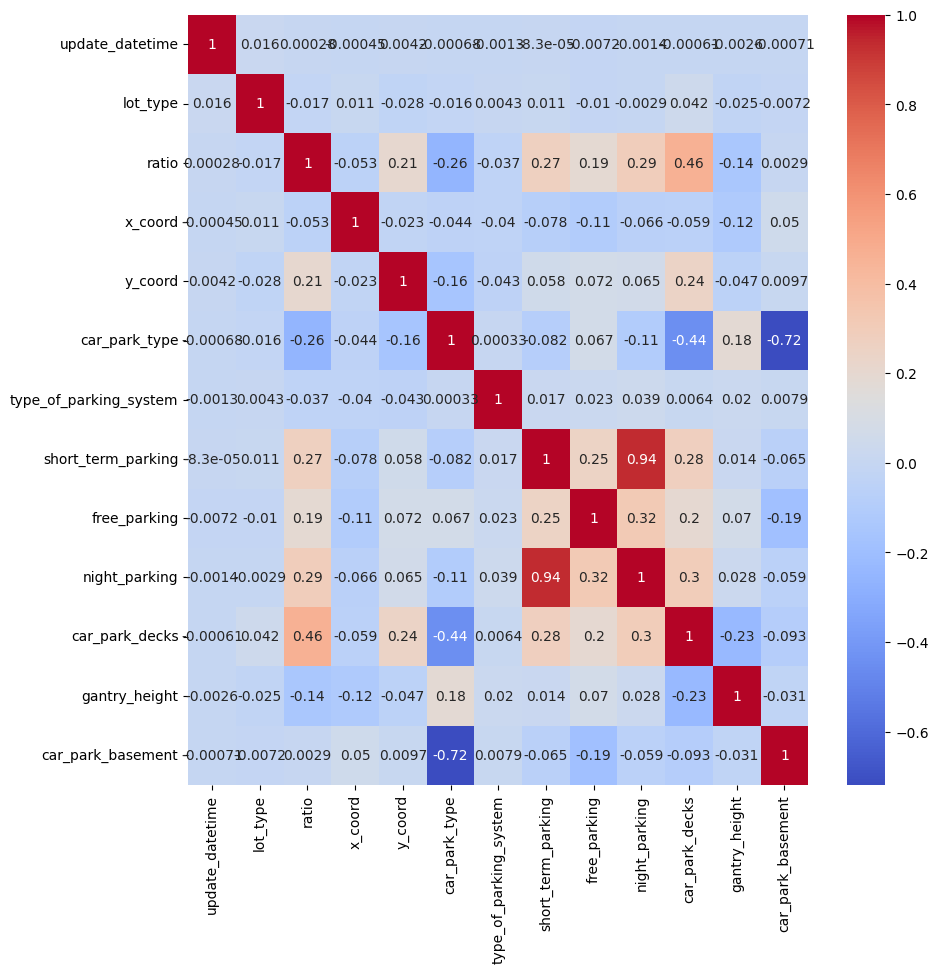

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')
plt.show()

<ipython-input-97-85e73af03848>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')


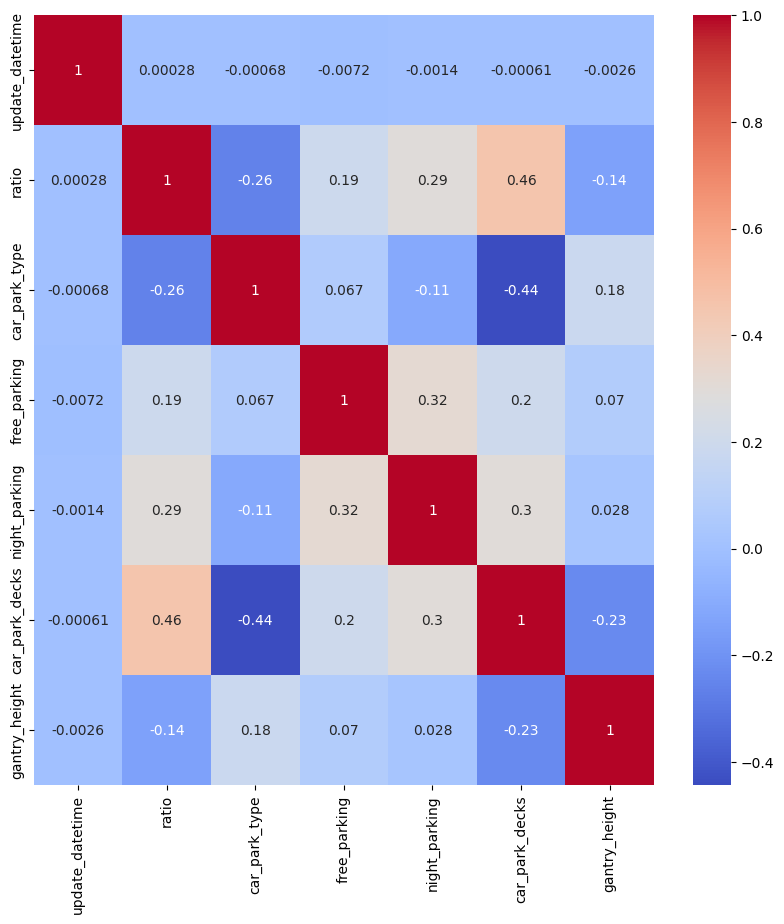

In [97]:
"""
In this we predict ratio, so that we can predict how much parking lot is full.
and we can drive no of parking occupied

so for now we remove highly correlated features and remove feature that are very
less correlated with ratio (i.e lot_type)

"""
#drop less correlated with ratio
merged_df.drop(columns=["lot_type", "x_coord", "y_coord", "type_of_parking_system"], inplace=True)
#drop highly correlated
merged_df.drop(columns=["short_term_parking", "car_park_basement"], inplace=True)
plt.figure(figsize=(10, 10))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [98]:
!pip install mplfinance

In [99]:
def remove_outliers(df, threshold=3):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        df[col] = df[col].where(z_scores < threshold)

    df.dropna(inplace=True)
    return df
merged_df = remove_outliers(merged_df)

In [100]:
merged_df.head()

,car_park_no,update_datetime,ratio,car_park_type,free_parking,night_parking,car_park_decks,gantry_height
0,HE12,1.000000,0.668813,5.0,2,1,-0.921341,0.92994
1,HE12,0.999679,-0.658014,5.0,2,1,-0.921341,0.92994
2,HE12,0.999358,-2.233622,5.0,2,1,-0.921341,0.92994
3,HE12,0.999036,-2.233622,5.0,2,1,-0.921341,0.92994
4,HE12,0.998715,-2.026305,5.0,2,1,-0.921341,0.92994


In [101]:
#check data strength
modal1,_,_=train_linear_regression(merged_df, x_cols=["update_datetime", "car_park_type", "free_parking", "night_parking", "car_park_decks", "gantry_height"], y_col='ratio')

Mean Squared Error: 0.7092990394132632
R-squared: 0.2630166964055287


In [102]:
#check data strength
optimized_model, _, _ = train_tweedie_regression(merged_df, x_cols=["update_datetime", "car_park_type", "free_parking", "night_parking", "car_park_decks", "gantry_height"], y_col='ratio')

Mean Squared Error: 0.19371214401243753
R-squared: -4.192614619922796


In [103]:
modal2,_,_=train_xgboost_regression(merged_df, x_cols=["update_datetime", "car_park_type", "free_parking", "night_parking", "car_park_decks", "gantry_height"], y_col='ratio')

Mean Squared Error: 0.603560806295223
R-squared: 0.37288194086439286


In [104]:
modal3,_,_=train_catboost_regression(merged_df, x_cols=["update_datetime", "car_park_type", "free_parking", "night_parking", "car_park_decks", "gantry_height"], y_col='ratio')

Mean Squared Error: 0.6016016328770575
R-squared: 0.3749175817123327


In [105]:
modal4, _, _, _ = train_neural_network(merged_df, x_cols=["update_datetime", "car_park_type", "free_parking", "night_parking", "car_park_decks", "gantry_height"], y_col='ratio')

Epoch 1/50
3938/3938 [==============================] - 15s 4ms/step - loss: 0.8350 - val_loss: 0.8227
Epoch 2/50
3938/3938 [==============================] - 15s 4ms/step - loss: 0.8267 - val_loss: 0.8198
Epoch 3/50
3938/3938 [==============================] - 16s 4ms/step - loss: 0.8246 - val_loss: 0.8183
Epoch 4/50
3938/3938 [==============================] - 14s 3ms/step - loss: 0.8235 - val_loss: 0.8180
Epoch 5/50
3938/3938 [==============================] - 13s 3ms/step - loss: 0.8226 - val_loss: 0.8202
Epoch 6/50
3938/3938 [==============================] - 17s 4ms/step - loss: 0.8218 - val_loss: 0.8173
Epoch 7/50
3938/3938 [==============================] - 21s 5ms/step - loss: 0.8213 - val_loss: 0.8160
Epoch 8/50
3938/3938 [==============================] - 13s 3ms/step - loss: 0.8207 - val_loss: 0.8185
Epoch 9/50
3938/3938 [==============================] - 14s 3ms/step - loss: 0.8201 - val_loss: 0.8171
Epoch 10/50
3938/3938 [==============================] - 15s 4ms/step - l

In [106]:
import joblib

# Assuming model is the trained TweedieRegressor model
# Save the model to a file
joblib.dump(optimized_model, 'tweedie_regression_model.pkl')
joblib.dump(modal1, 'linear_regression_modal.pkl')
joblib.dump(modal2, 'xgboost_modal.pkl')
joblib.dump(modal3, 'catboost_modal.pkl')
modal4.save('neural_network_modal')


In [107]:
merged_df.to_csv('processed_data.csv')